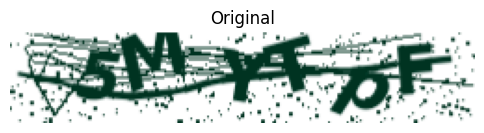

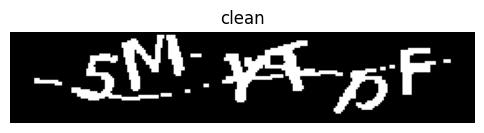

captcha_0.png → SMYAEgF



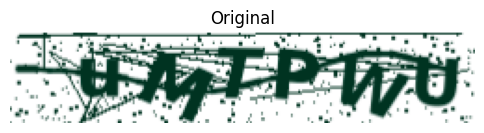

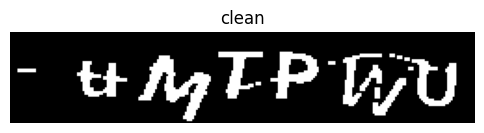

captcha_1.png → t4AgEPTyu



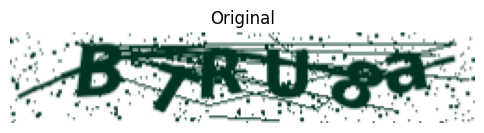

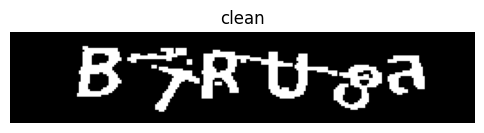

captcha_10.png → BRA



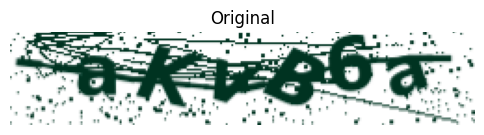

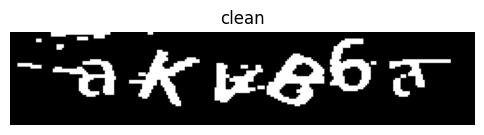

captcha_100.png → akreoa



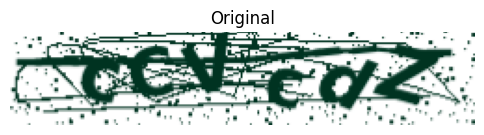

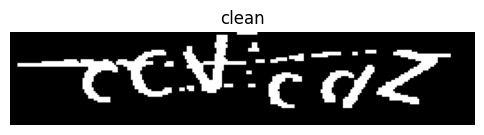

captcha_101.png → CEMEGZ



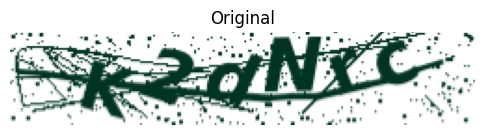

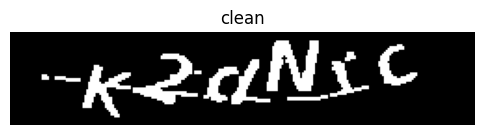

captcha_102.png → RPANTC



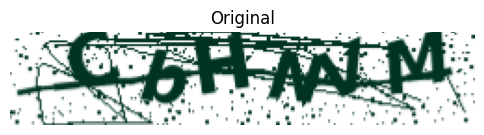

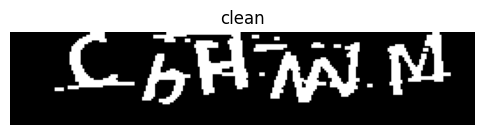

captcha_11.png → LEARY



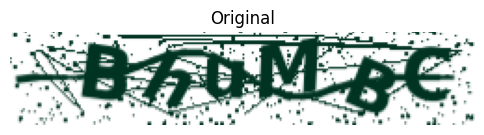

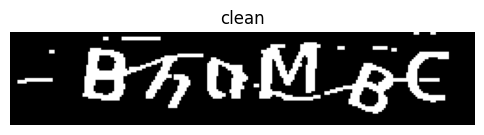

captcha_12.png → BAOMgC



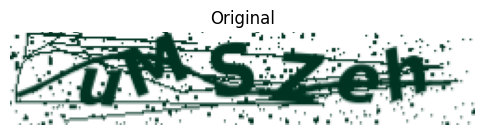

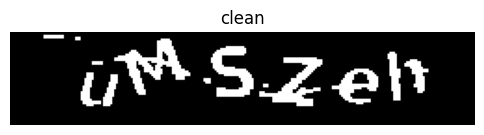

captcha_13.png → uSSZelh



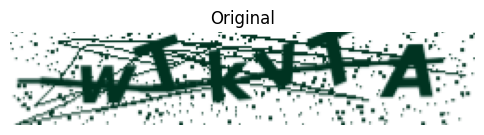

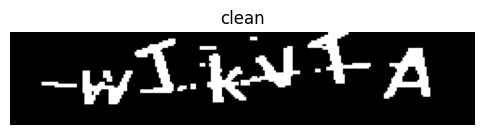

captcha_14.png → what



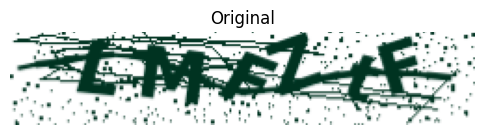

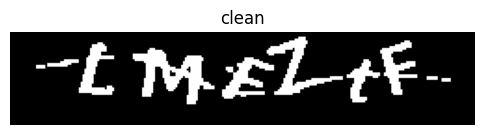

captcha_15.png → TEMELtE



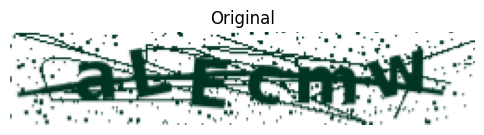

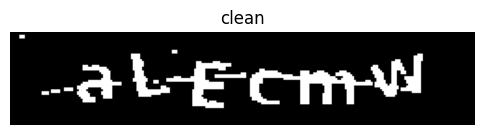

captcha_16.png → aE



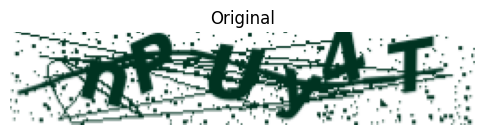

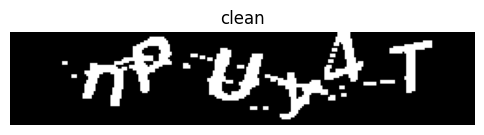

captcha_17.png → Py



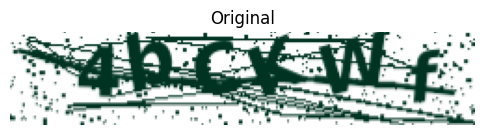

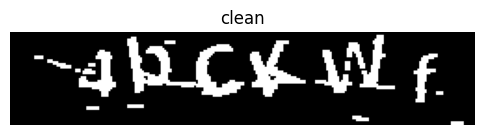

captcha_18.png → agLCyf



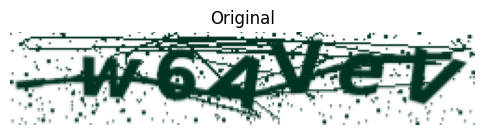

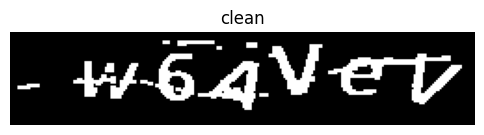

captcha_19.png → wegverpy



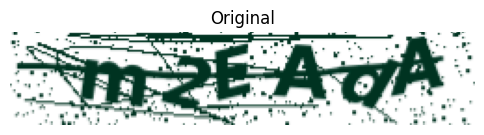

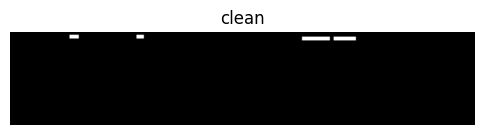

captcha_2.png → 


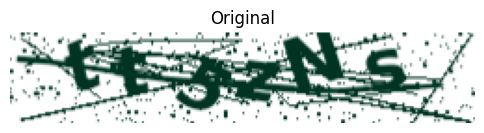

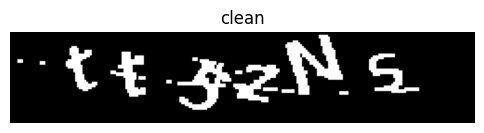

captcha_20.png → hEBeNG



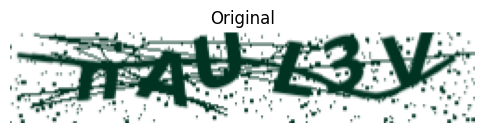

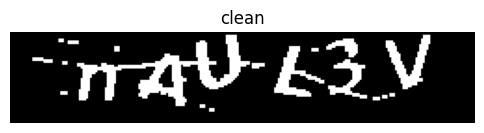

captcha_21.png → igE3V



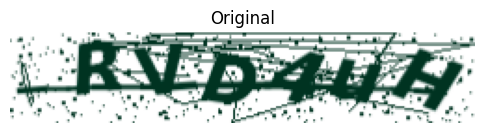

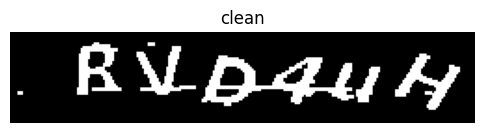

captcha_22.png → BVpguny



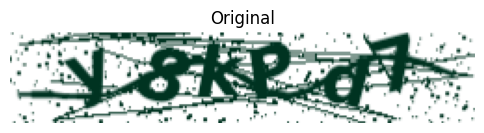

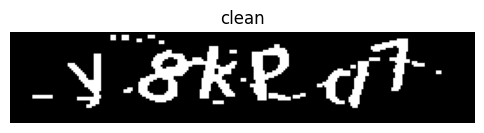

captcha_23.png → VEPREft



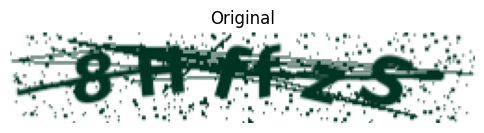

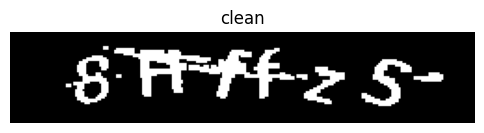

captcha_24.png → SFPRR2S



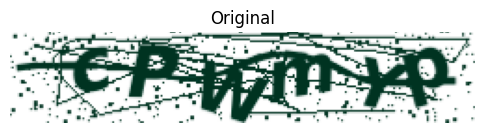

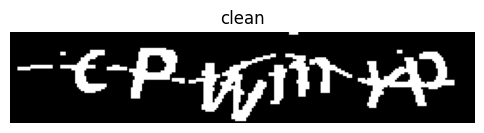

captcha_25.png → EPfiry



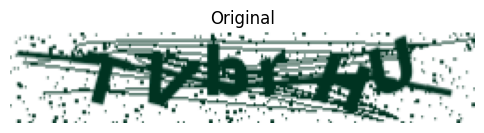

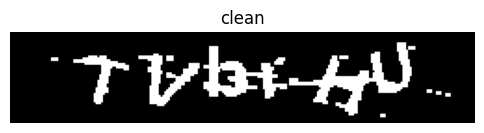

captcha_26.png → Tyra



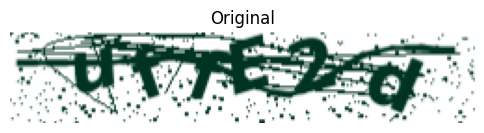

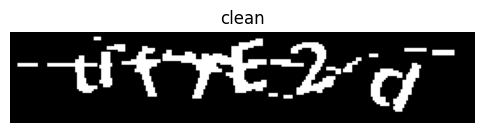

captcha_27.png → AED



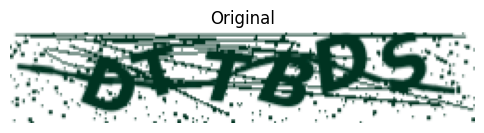

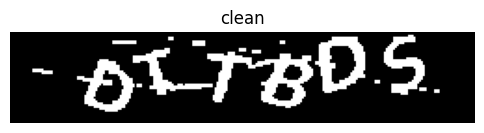

captcha_28.png → Btrgds



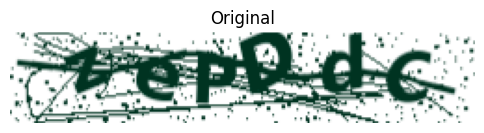

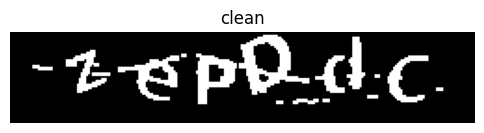

captcha_29.png → bephic



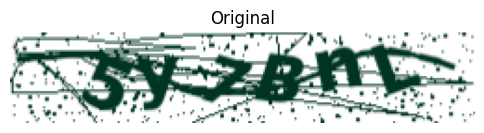

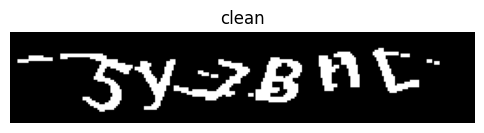

captcha_3.png → Sy2enT



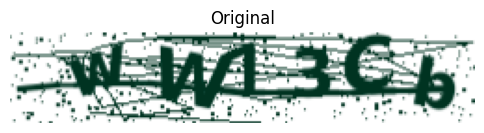

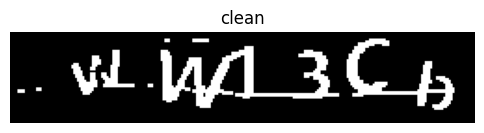

captcha_30.png → WLW13C



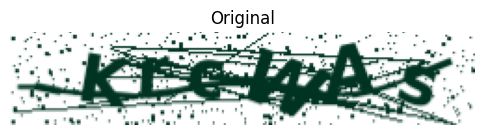

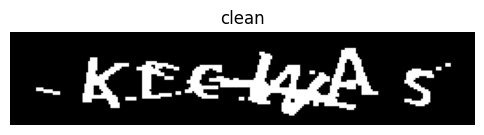

captcha_31.png → Kegs



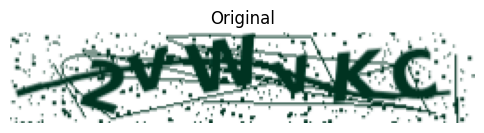

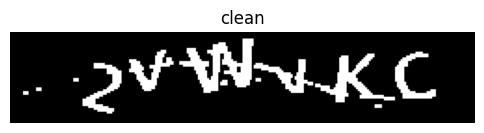

captcha_32.png → DVARLKC



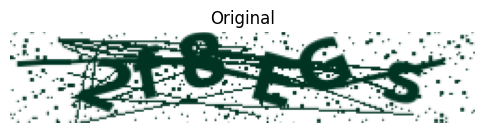

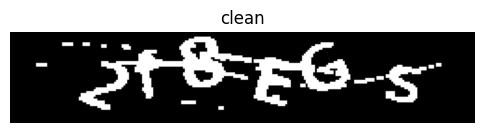

captcha_33.png → Stress



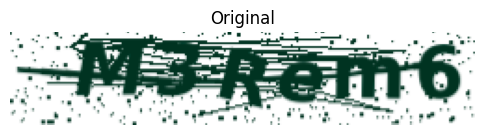

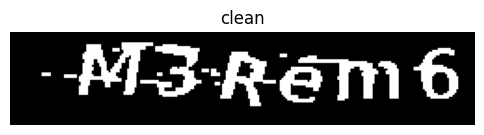

captcha_34.png → MSRem6



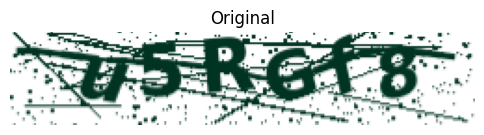

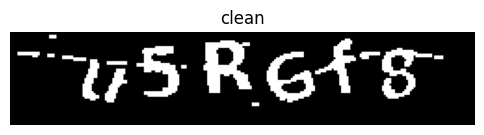

captcha_35.png → eSsRets



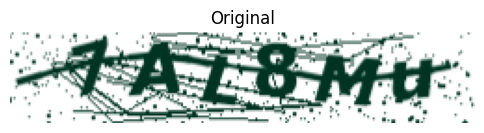

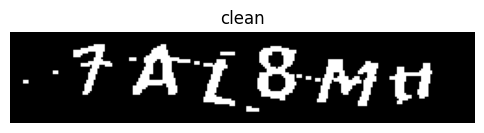

captcha_36.png → FALTEMO



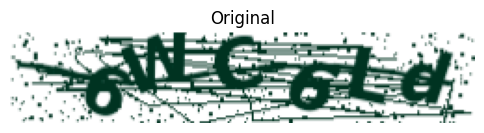

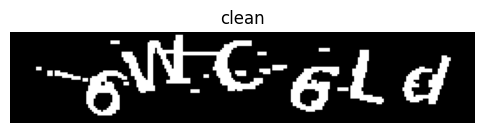

captcha_37.png → ADCELa



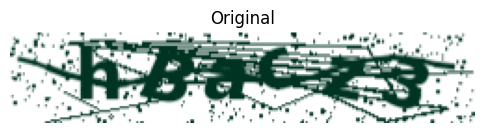

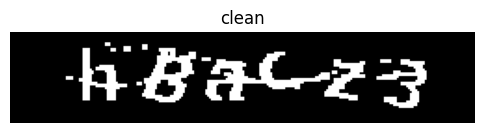

captcha_38.png → heaces



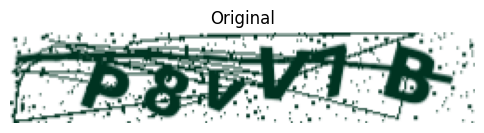

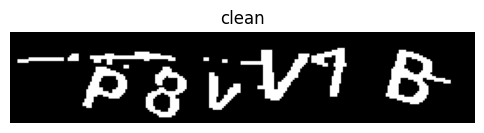

captcha_39.png → BevvtB



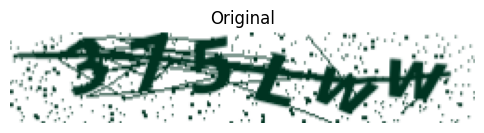

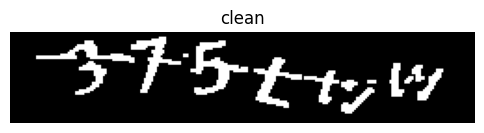

captcha_4.png → STSttyty



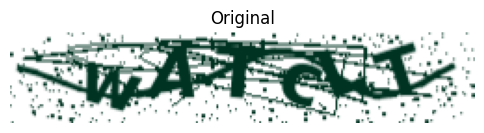

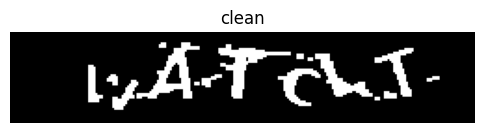

captcha_40.png → yAATALT



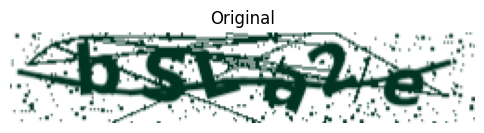

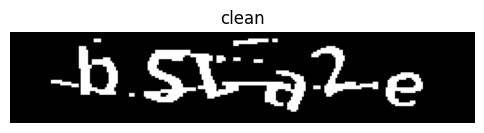

captcha_41.png → bSYale



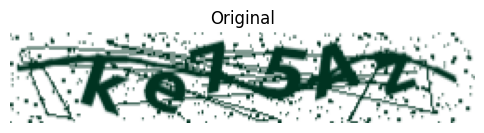

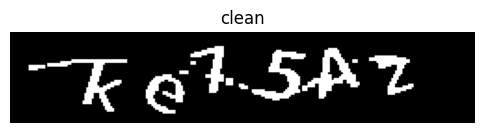

captcha_42.png → KGESRT



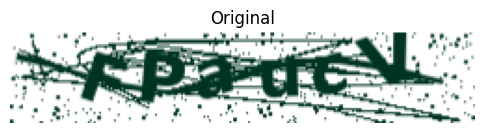

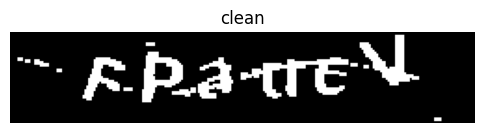

captcha_43.png → RPacweN



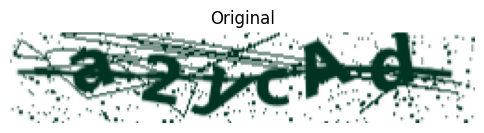

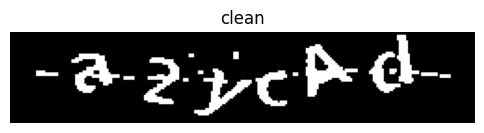

captcha_44.png → a2ypckd



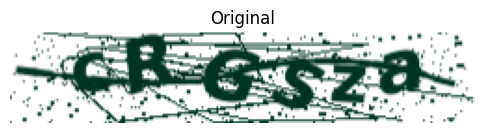

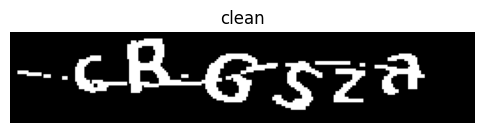

captcha_45.png → Chesza



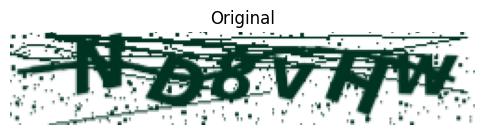

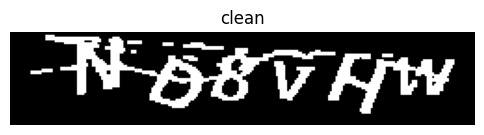

captcha_46.png → Saw



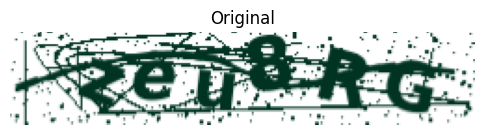

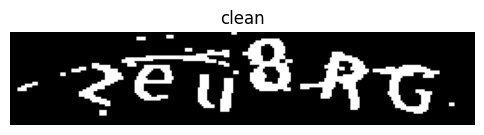

captcha_47.png → 2EGERG



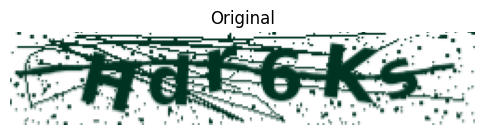

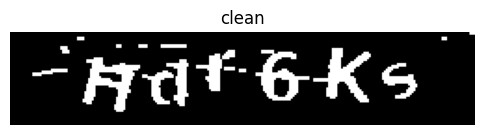

captcha_48.png → KHateKs



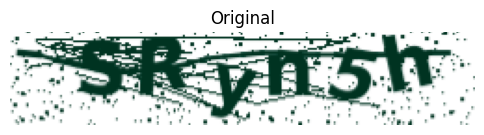

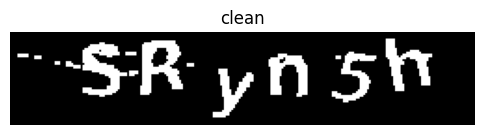

captcha_49.png → SRynsh



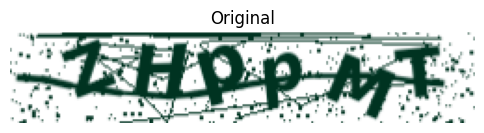

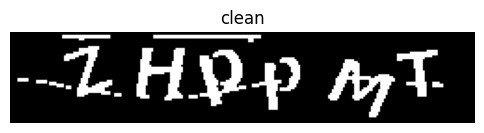

captcha_5.png → LAQDPfyt



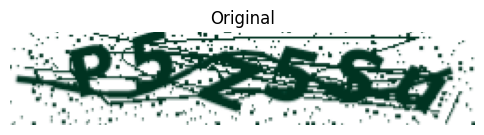

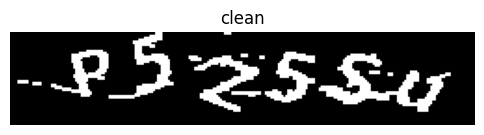

captcha_50.png → P3S5S7



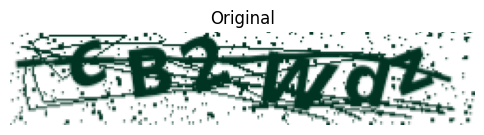

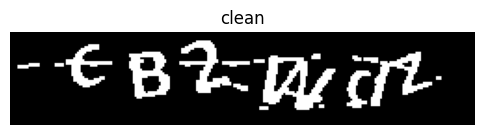

captcha_51.png → EpEmat



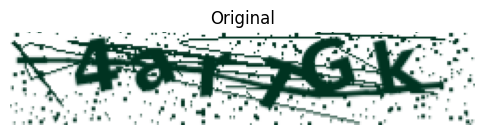

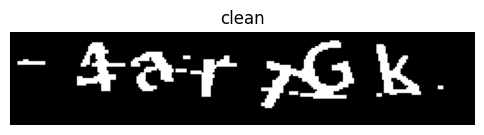

captcha_52.png → Feer7Gk



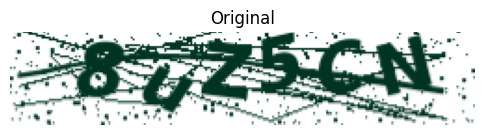

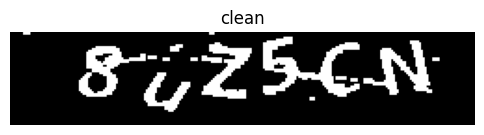

captcha_53.png → BGZSN



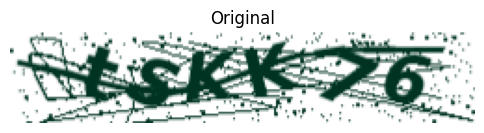

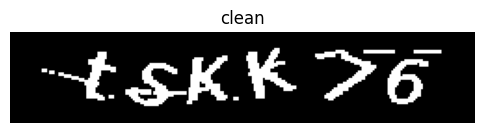

captcha_54.png → ESKKOE



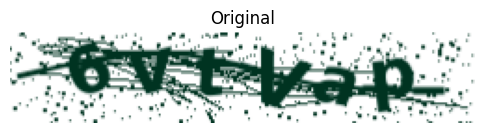

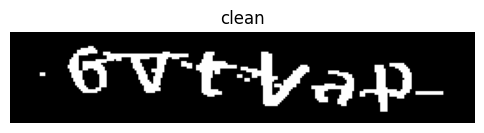

captcha_55.png → 6Vtyap



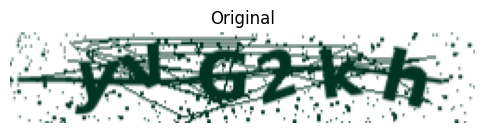

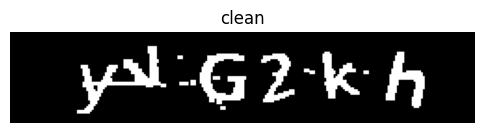

captcha_56.png → yalG2kA



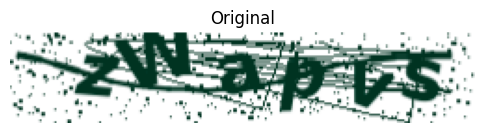

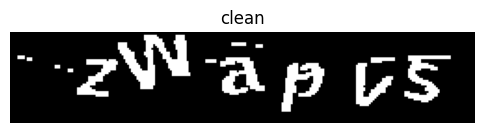

captcha_57.png → aNapos



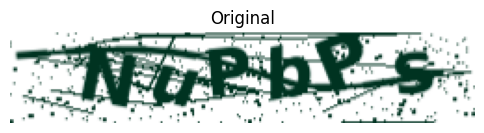

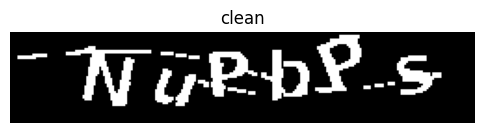

captcha_58.png → Niebls



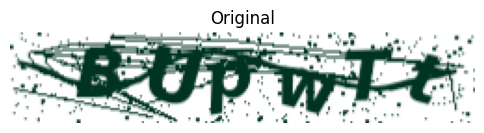

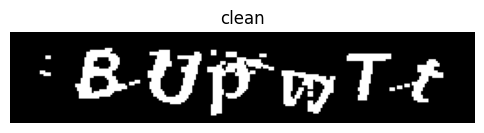

captcha_59.png → BUPyTt



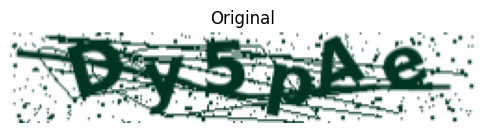

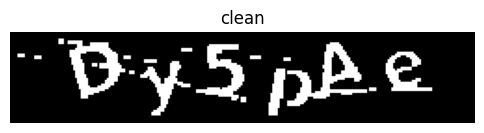

captcha_6.png → PySphe



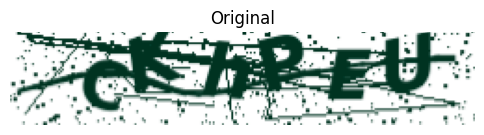

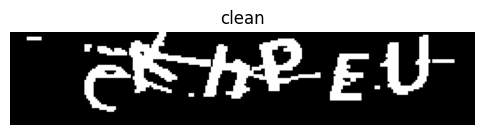

captcha_60.png → EAPe



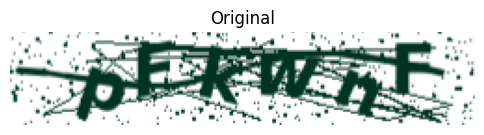

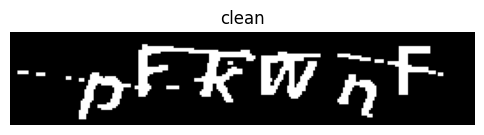

captcha_61.png → pPERWAF



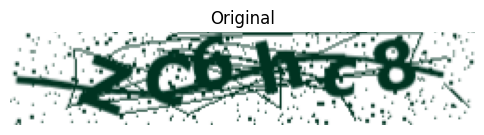

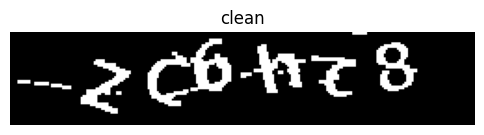

captcha_62.png → Z2CHNe8



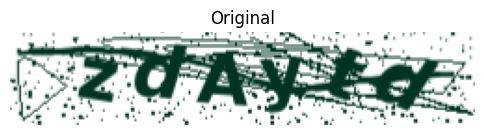

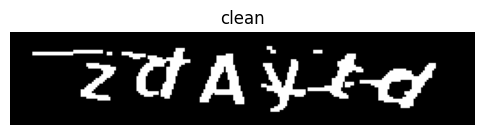

captcha_63.png → SUAytey



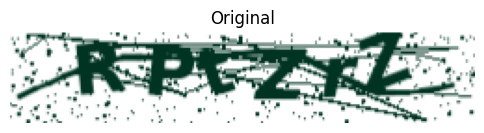

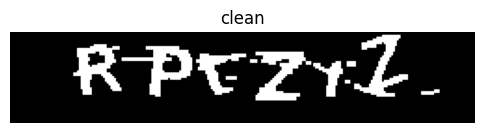

captcha_64.png → RPCZre



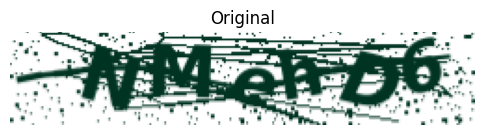

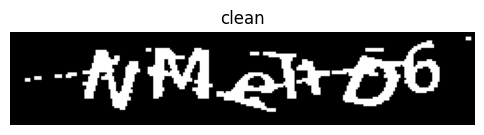

captcha_65.png → AMar6



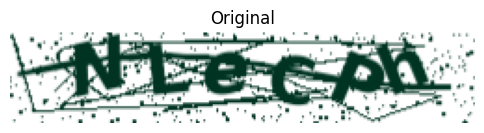

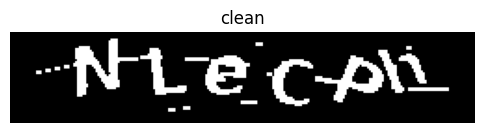

captcha_66.png → oNtLecet



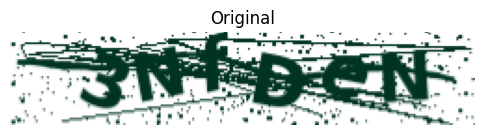

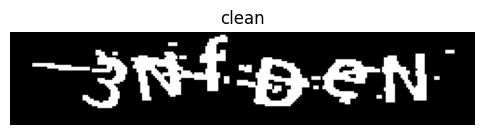

captcha_67.png → STHpen



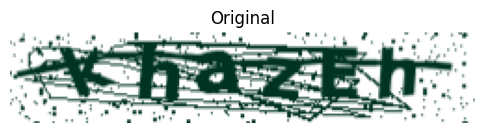

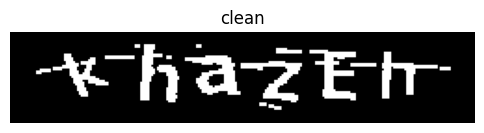

captcha_68.png → ahaZzeh



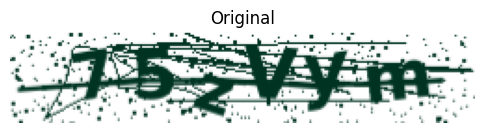

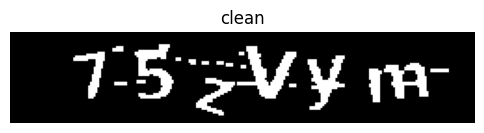

captcha_69.png → TEaSsVyw



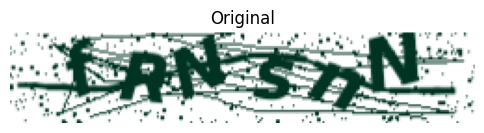

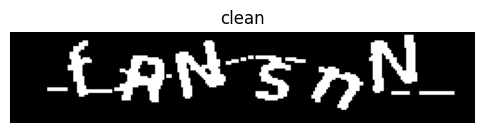

captcha_7.png → Laney



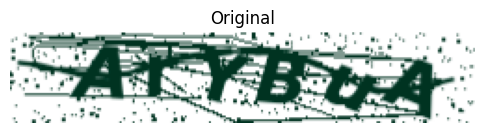

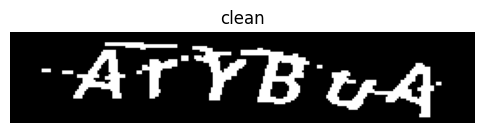

captcha_70.png → ATYRo4q



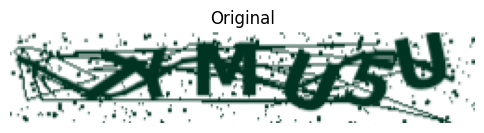

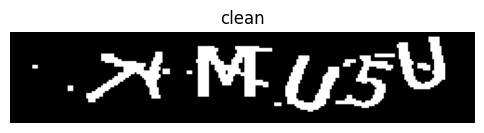

captcha_71.png → PEM



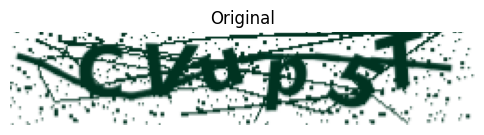

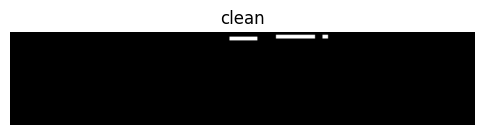

captcha_72.png → 


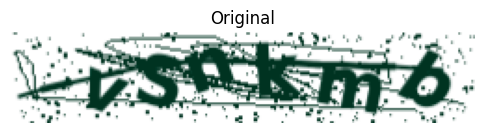

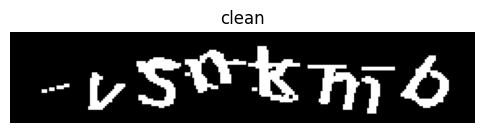

captcha_73.png → pSYKATS



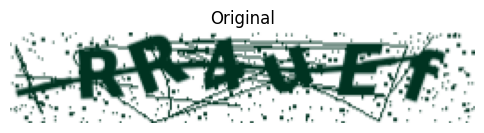

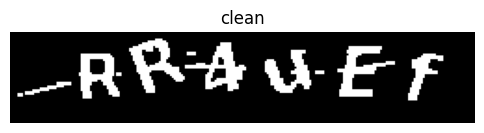

captcha_74.png → ROAUWEF



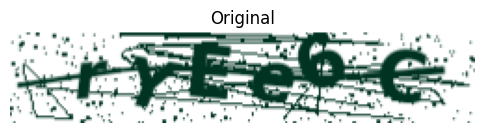

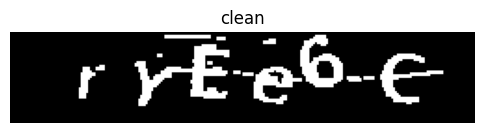

captcha_75.png → ryeee



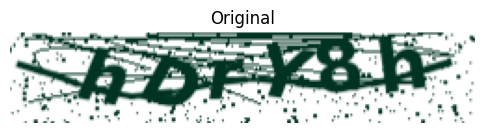

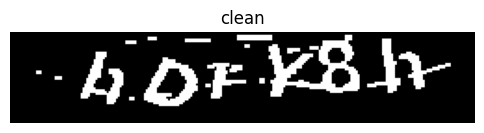

captcha_76.png → bOorvah



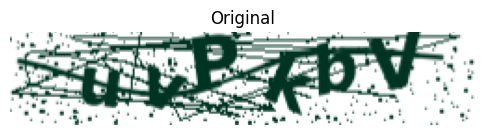

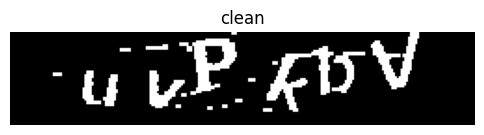

captcha_77.png → UPR



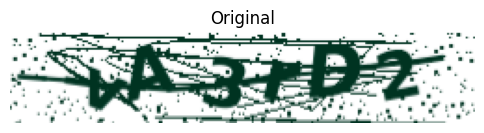

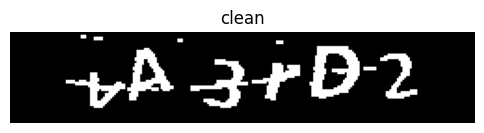

captcha_78.png → Ph34D2



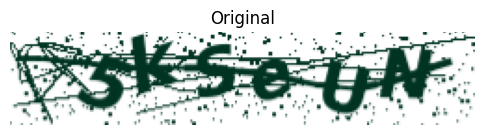

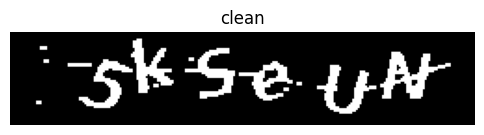

captcha_79.png → itgKSeyA



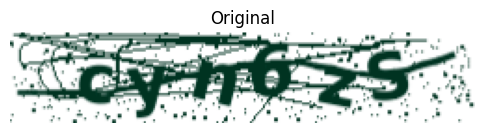

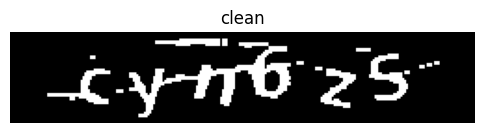

captcha_8.png → eypryt25



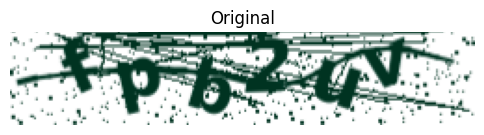

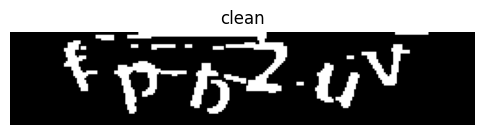

captcha_80.png → araeN



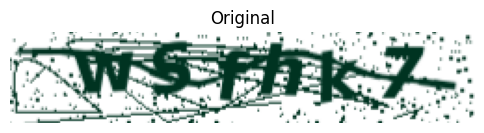

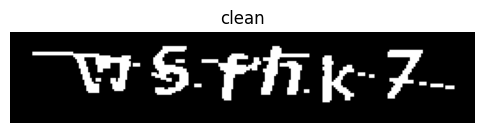

captcha_81.png → TWSPITZ



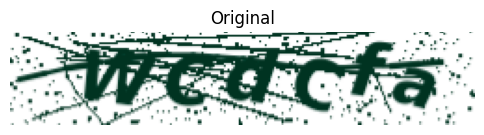

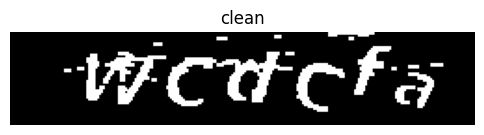

captcha_82.png → WCeChs



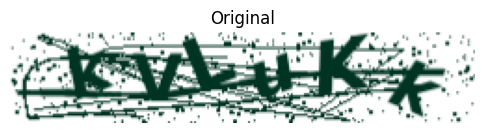

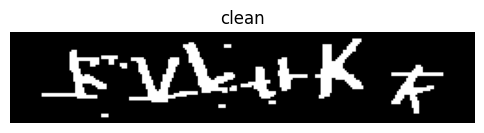

captcha_83.png → eyNearKg



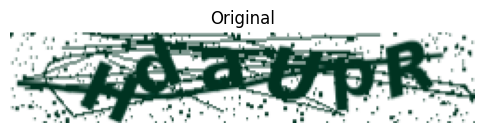

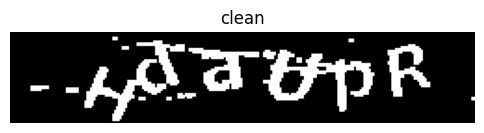

captcha_84.png → ALTEPR



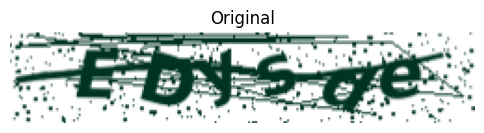

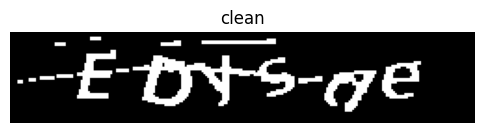

captcha_85.png → EDTSe



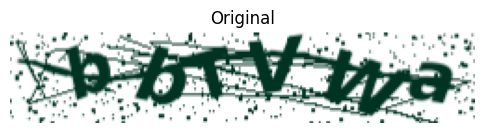

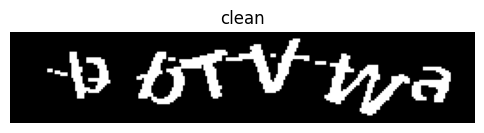

captcha_86.png → pata



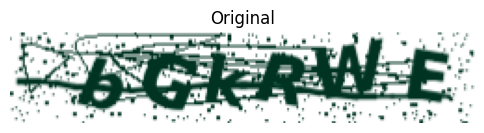

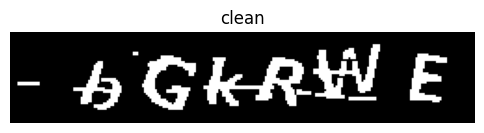

captcha_87.png → bGRAWE



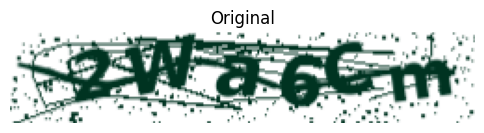

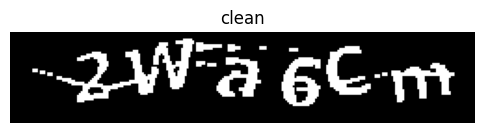

captcha_88.png → 2Wa6Cn



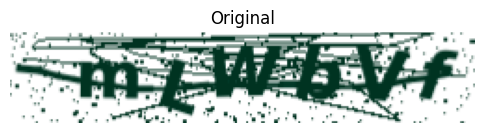

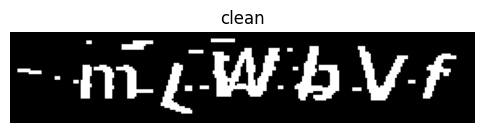

captcha_89.png → nEWbVr



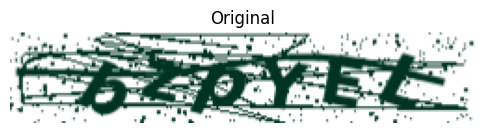

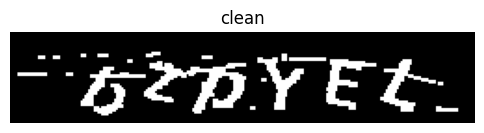

captcha_9.png → BepVEL



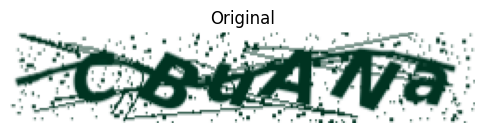

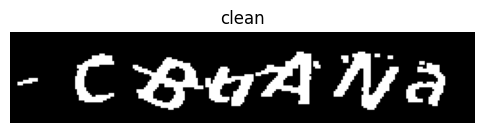

captcha_90.png → CeaAtva



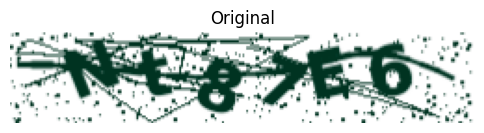

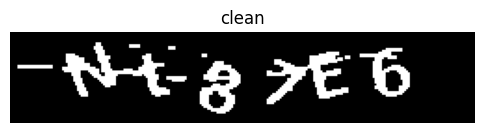

captcha_91.png → WgFER



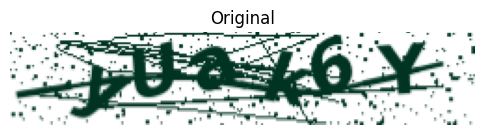

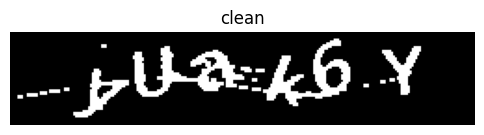

captcha_92.png → pUeeGy



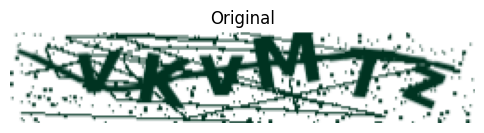

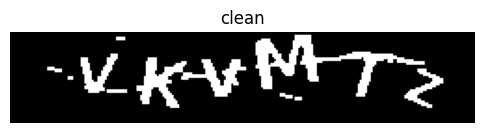

captcha_93.png → METS



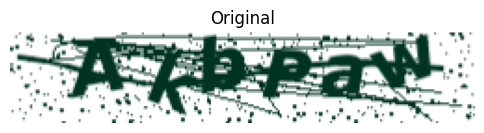

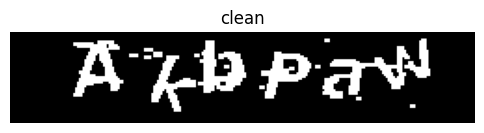

captcha_94.png → AEpPat



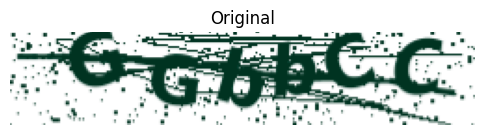

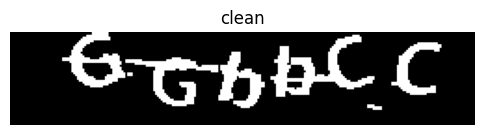

captcha_95.png → Sobel



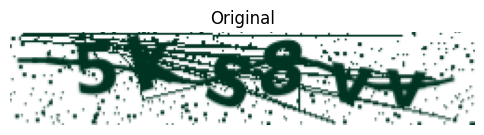

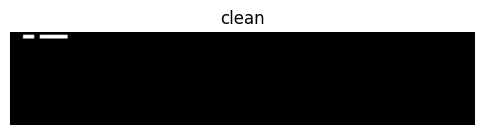

captcha_96.png → ee



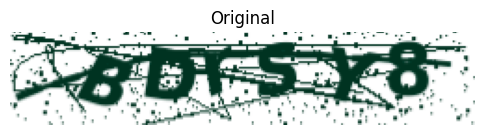

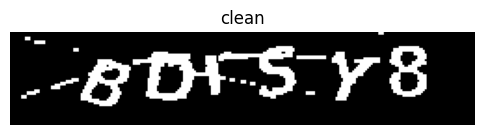

captcha_97.png → BOrSY8



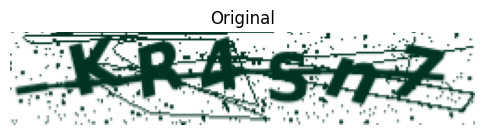

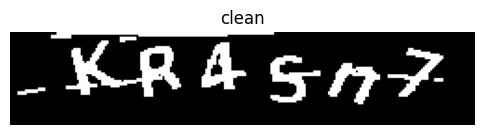

captcha_98.png → KRASAZ



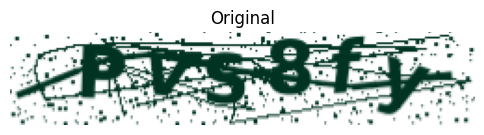

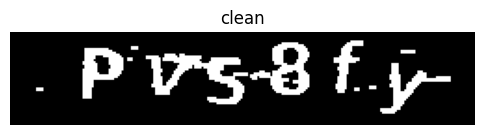

captcha_99.png → PTSBEY

Saved predictions.csv


In [71]:
# ML pipeline for captcha processing and prediction with visualization
import cv2
import numpy as np
import pytesseract
import os
import pandas as pd
import matplotlib.pyplot as plt

# Config Tesseract (chỉnh path cho phù hợp)
pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

# Hàm hiển thị ảnh
def show_step(title, img, cmap="gray"):
    plt.figure(figsize=(6,4))
    if len(img.shape) == 2:  # ảnh grayscale
        plt.imshow(img, cmap=cmap)
    else:  # ảnh màu
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# OCR function theo pipeline bạn có
def process_and_ocr(img_path, visualize=False):
    img = cv2.imread(img_path)
    if img is None:
        return ""

    if visualize: show_step("Original", img, cmap=None)

    # 1) Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2) Median Blur
    gray_blur = cv2.medianBlur(gray, 5)

    # 3) Color-based Mask
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower = np.array([0,0,0])
    upper = np.array([180,255,55])
    mask = cv2.inRange(hsv, lower, upper)
    masked = cv2.bitwise_and(gray_blur, gray_blur, mask=mask)

    # morth
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,2))
    clean = cv2.morphologyEx(masked, cv2.MORPH_OPEN, kernel)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
    dilated = cv2.dilate(clean, kernel, iterations=1)



    # threshold
    _, binary = cv2.threshold(dilated, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


    if visualize: 
        show_step("clean", binary)

 
    config = "--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"
    text = pytesseract.image_to_string(binary, config=config)

    return text


# Folder chứa ảnh
image_dir = "images"
results = []

for file in os.listdir(image_dir):
    if file.lower().endswith((".png", ".jpg", ".jpeg")):
        path = os.path.join(image_dir, file)

        # Gọi hàm với visualize=True để xem ảnh từng bước
        pred = process_and_ocr(path, visualize=True)

        print(f"{file} → {pred}")
        results.append({"filename": file, "prediction": pred})

# Xuất CSV
df = pd.DataFrame(results)
df.to_csv("predictions.csv", index=False, encoding="utf-8")
print("Saved predictions.csv")


In [ ]:
import cv2
import numpy as np
import pytesseract
import os
import pandas as pd

def OCR(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return ""

    # 1) Grayscale
    config = "--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"
    pred = pytesseract.image_to_string(img, config=config)
    return pred
# Config Tesseract (chỉnh path cho phù hợp)
pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
# prediction file before Captcha processing (raw prediction)
image_dir = "images"
results = []

for file in os.listdir(image_dir):
    if file.lower().endswith((".png", ".jpg", ".jpeg")):
        path = os.path.join(image_dir, file)
        pred = OCR(path)
        print(f"{file} → {pred}")
        results.append({"filename": file, "prediction": pred})

df = pd.DataFrame(results)
df.to_csv("raw_predictions.csv", index=False, encoding="utf-8")
print("Saved raw_predictions.csv")

        

captcha_0.png → SSR

captcha_1.png → SREPTU

captcha_10.png → UBS

captcha_100.png → DSUs

captcha_101.png → Nore

captcha_102.png → SeaNrc

captcha_11.png → BRAM

captcha_12.png → BFuItee

captcha_13.png → LawSizer

captcha_14.png → EACErAS

captcha_15.png → AEMSLLE

captcha_16.png → See

captcha_17.png → Ate

captcha_18.png → Se

captcha_19.png → WEQvey

captcha_2.png → MmBEAGA

captcha_20.png → Seco

captcha_21.png → DFA

captcha_22.png → BND

captcha_23.png → Spee

captcha_24.png → Corts

captcha_25.png → SEPaomse

captcha_26.png → roe

captcha_27.png → UiTeaagy

captcha_28.png → Bree

captcha_29.png → Teepedc

captcha_3.png → year

captcha_30.png → oWway7iscy

captcha_31.png → eEeigbs

captcha_32.png → BICC

captcha_33.png → DpESte

captcha_34.png → Sermo

captcha_35.png → Toner

captcha_36.png → eon

captcha_37.png → Bee

captcha_38.png → Reees

captcha_39.png → pepiB

captcha_4.png → soot

captcha_40.png → Pre

captcha_41.png → SRShata

captcha_42.png → ANYSsa

captcha_43.png → 

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Load ground truth
labels = pd.read_csv("labels.csv")   # cột: filename, label
preds = pd.read_csv("predictions.csv")  # cột: filename, prediction
raw_preds = pd.read_csv("raw_predictions.csv")
# join theo filename
df = labels.merge(preds, on="filename")
df2 = labels.merge(raw_preds, on="filename")
# word-level accuracy (so sánh nguyên chuỗi)
word_acc = accuracy_score(df["label"], df["prediction"])
word_acc_raw = accuracy_score(df2["label"], df2["prediction"])
# character-level accuracy
def char_accuracy(gt, pred):
    total_chars = 0
    correct_chars = 0
    for g, p in zip(gt, pred):
        total_chars += len(g)
        correct_chars += sum(gc == pc for gc, pc in zip(g, p))
    return correct_chars / total_chars if total_chars > 0 else 0

#char_acc = char_accuracy(df["label"], df["prediction"])
char_acc_raw = char_accuracy(df2["label"], df2["prediction"])

print(f"Word-level Accuracy: {word_acc:.2%}")
print(f"Character-level Accuracy: {char_acc:.2%}")

print(f"Word-level raw Accuracy: {word_acc_raw:.2%}")
print(f"Character-level raw Accuracy: {char_acc_raw:.2%}")


Word-level raw Accuracy: 0.00%
Character-level raw Accuracy: 6.32%
